In [13]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, VarianceThreshold, RFE, SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
# Assuming the dataset is in a CSV file named 'breast_cancer.csv'
data = pd.read_csv('E:/R(7)/MinMaX.csv')

# Split data into features and target
x = data.drop('Target', axis=1)
y = data['Target']

In [19]:
# chi-ssquare
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.feature_selection import SelectFpr, chi2
selector = SelectFpr(score_func=chi2, alpha=0.05)
new_data = selector.fit_transform(x, y)
 
mask = selector.get_support()
new_features = x.columns[mask]
print(new_features)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'compactness_se',
       'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


In [21]:
df2 = data.drop(data.columns.difference(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'compactness_se',
       'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst']) , axis=1)

df2['Target']=y
df2.to_csv('E:/R(7)/Dataset_2.csv')

In [30]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state = 13)

rfecv = RFECV(estimator, cv=5, n_jobs=-1, scoring='accuracy', min_features_to_select = 4)
rfecv = rfecv.fit(x, y)
cols = rfecv.get_support(indices=True)
cols
features = x.columns[cols]
features

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [31]:
df4 = data.drop(data.columns.difference(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst']) , axis=1)
df4['Target']=y
df4.to_csv('E:/R(7)/Dataset_4.csv')

In [51]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.3)
ridge_coef = ridge.fit(x,y).coef_
print(ridge_coef)

[ 0.3873735   0.19028391  0.27234186 -0.56541139 -0.03291055 -0.6301482
  0.16341607  0.52709376 -0.01168424 -0.2838511   0.82433862 -0.00332565
  0.09883689 -0.65229196  0.36723173 -0.24945797 -0.59098446  0.22483062
  0.09432662  0.01193508  0.94985207  0.25420366  0.33360361 -0.6488655
  0.19804654  0.01210314  0.35271664  0.37249794  0.36478206  0.59520993]


In [53]:
np.array(names)[ridge_coef > 0.1]

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'concavity_mean',
       'concave points_mean', 'radius_se', 'smoothness_se',
       'concave points_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'smoothness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object)

In [54]:
df7 = data.drop(data.columns.difference(['radius_mean', 'texture_mean', 'perimeter_mean', 'concavity_mean',
       'concave points_mean', 'radius_se', 'smoothness_se',
       'concave points_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'smoothness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst']) , axis=1)
df7['Target']=y
df7.to_csv('E:/R(7)/Dataset_7.csv')

In [57]:
import pandas as pd

# Load datasets from the D drive
file_paths = [
    'E:/R(7)/dataset_2.csv',
    'E:/R(7)/dataset_4.csv',
    'E:/R(7)/dataset_7.csv'
]

datasets = [pd.read_csv(file_path) for file_path in file_paths]

# Extract feature sets
feature_sets = [set(data.columns) for data in datasets]

# Find common features
common_features = set.intersection(*feature_sets)

# Print common features
print("Common features in all datasets:")
print(common_features)


Common features in all datasets:
{'perimeter_worst', 'radius_mean', 'fractal_dimension_worst', 'concavity_mean', 'concave points_mean', 'texture_worst', 'concave points_worst', 'symmetry_worst', 'Target', 'texture_mean', 'smoothness_worst', 'radius_worst', 'concavity_worst', 'perimeter_mean'}


In [58]:
df8 = data.drop(data.columns.difference(['perimeter_worst', 'radius_mean', 'fractal_dimension_worst', 'concavity_mean', 'concave points_mean', 'texture_worst', 'concave points_worst', 'symmetry_worst', 'Target', 'texture_mean', 'smoothness_worst', 'radius_worst', 'concavity_worst', 'perimeter_mean']) , axis=1)

In [59]:
df8

,radius_mean,texture_mean,perimeter_mean,concavity_mean,concave points_mean,radius_worst,texture_worst,perimeter_worst,smoothness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Target
0,0.521037,0.022658,0.545989,0.703140,0.731113,0.620776,0.141525,0.668310,0.601136,0.568610,0.912027,0.598462,0.418864,1
1,0.643144,0.272574,0.615783,0.203608,0.348757,0.606901,0.303571,0.539818,0.347553,0.192971,0.639175,0.233590,0.222878,1
2,0.601496,0.390260,0.595743,0.462512,0.635686,0.556386,0.360075,0.508442,0.483590,0.359744,0.835052,0.403706,0.213433,1
3,0.210090,0.360839,0.233501,0.565604,0.522863,0.248310,0.385928,0.241347,0.915472,0.548642,0.884880,1.000000,0.773711,1
4,0.629893,0.156578,0.630986,0.463918,0.518390,0.519744,0.123934,0.506948,0.437364,0.319489,0.558419,0.157500,0.142595,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.571462,0.690358,0.623266,0.383262,0.576174,0.461137,0.328035,0.761512,0.097575,0.105667,1
565,0.622320,0.626987,0.604036,0.337395,0.486630,0.560655,0.699094,0.520892,0.300007,0.256789,0.559450,0.198502,0.074315,1
566,0.455251,0.621238,0.445788,0.216753,0.263519,0.393099,0.589019,0.379949,0.282177,0.271805,0.487285,0.128721,0.151909,1
567,0.644564,0.663510,0.665538,0.823336,0.755467,0.633582,0.730277,0.668310,0.619626,0.749760,0.910653,0.497142,0.452315,1


In [60]:
df8.to_csv('E:/R(7)/Final.csv')

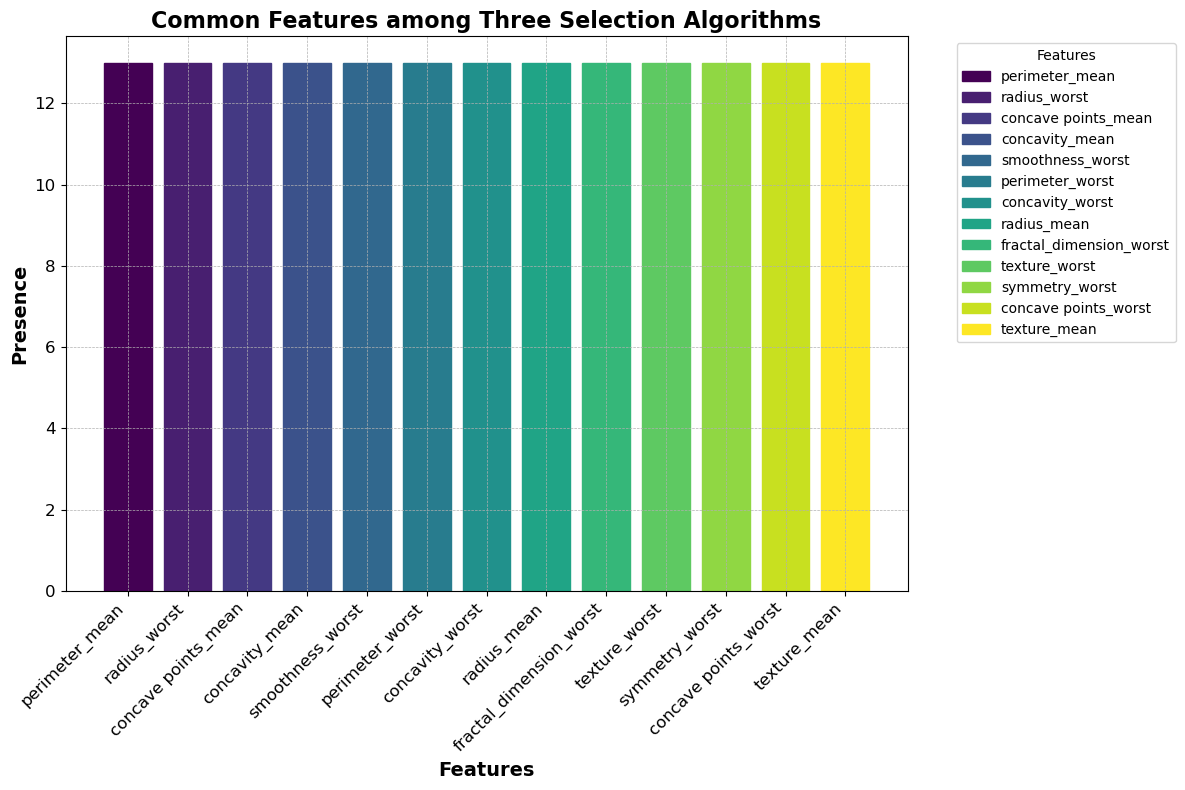

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load datasets from specified file paths
file_paths = [
    'E:/R(7)/dataset_2.csv',
    'E:/R(7)/dataset_4.csv',
    'E:/R(7)/dataset_7.csv',
]

# Read the datasets
datasets = [pd.read_csv(file_path) for file_path in file_paths]

# Find common columns
common_columns = set(datasets[0].columns)
for dataset in datasets[1:]:
    common_columns.intersection_update(dataset.columns)

# Remove 'Target' from the common columns if present
common_columns.discard('Target')

# Convert to list for consistent ordering
common_columns = list(common_columns)

# Data for plotting
column_counts = [len(common_columns)] * len(common_columns)

# Creating the bar diagram for common features only, excluding 'Target'
plt.figure(figsize=(12, 8))
bars = plt.bar(common_columns, column_counts, color=plt.cm.Paired(np.arange(len(common_columns))))

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.xlabel('Features', fontsize=14, fontweight='bold')
plt.ylabel('Presence', fontsize=14, fontweight='bold')
plt.title('Common Features among Three Selection Algorithms', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Adding grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Color the bars
for bar, color in zip(bars, plt.cm.viridis(np.linspace(0, 1, len(common_columns)))):
    bar.set_color(color)

# Adding a legend if needed
plt.legend(bars, common_columns, title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
